# Variable categórica


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [17]:
df = pd.read_csv("train.csv")

variables_numericas = [
'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]

df = df[variables_numericas]

In [18]:
p40 = df['SalePrice'].quantile(0.40)
p90 = df['SalePrice'].quantile(0.90)

def clasificar_precio(precio: float) -> str:
    if precio <= p40:
        return "Económica"
    elif precio <= p90:
        return "Intermedia"
    else:
        return "Cara"

df['CategoriaPrecio'] = df['SalePrice'].apply(clasificar_precio)

X = df.drop(['SalePrice', 'CategoriaPrecio'], axis=1)
y = df['CategoriaPrecio']


### División de datos


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo de clasificación Naive Bayes


#### Entrenando el modelo


In [35]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred = gaussian.predict(X_test)

#### Evaluación del modelo


In [37]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

In [40]:
print("\nEvaluación del Modelo Naïve Bayes:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Evaluación del Modelo Naïve Bayes:
Precisión (Accuracy): 0.82
Precisión: 0.82
Recall: 0.82
F1-score: 0.82


#### Matriz de confusión


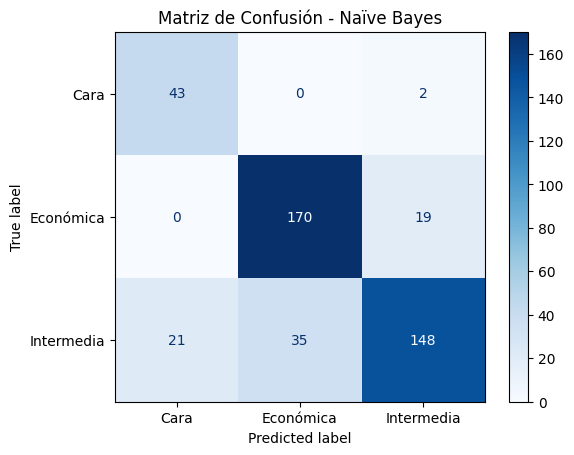

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gaussian.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Naïve Bayes')
plt.show()